In [163]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

df = pd.read_csv('House_prediction_dataset/train.csv')

C:\Users\malkhathery\AppData\Local\Temp\ipykernel_16876\100783352.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [164]:
df["Alley"] =  df["Alley"].fillna("Na")
df["MasVnrType"] =  df["MasVnrType"].fillna("Na")
df["BsmtQual"] =  df["BsmtQual"].fillna("Na")
df["BsmtCond"] =  df["BsmtCond"].fillna("Na")
df["BsmtExposure"] =  df["BsmtExposure"].fillna("Na")
df["BsmtFinType1"] =  df["BsmtFinType1"].fillna("Na")
df["BsmtFinType2"] =  df["BsmtFinType2"].fillna("Na")

df["FireplaceQu"] =  df["FireplaceQu"].fillna("Na")
df["GarageType"] =  df["GarageType"].fillna("Na")
df["GarageFinish"] =  df["GarageFinish"].fillna("Na")
df["GarageQual"] =  df["GarageQual"].fillna("Na")
df["GarageCond"] =  df["GarageCond"].fillna("Na")
df["PoolQC"] =  df["PoolQC"].fillna("Na")
df["Fence"] =  df["Fence"].fillna("Na")
df["MiscFeature"] =  df["MiscFeature"].fillna("Na")



<AxesSubplot: >

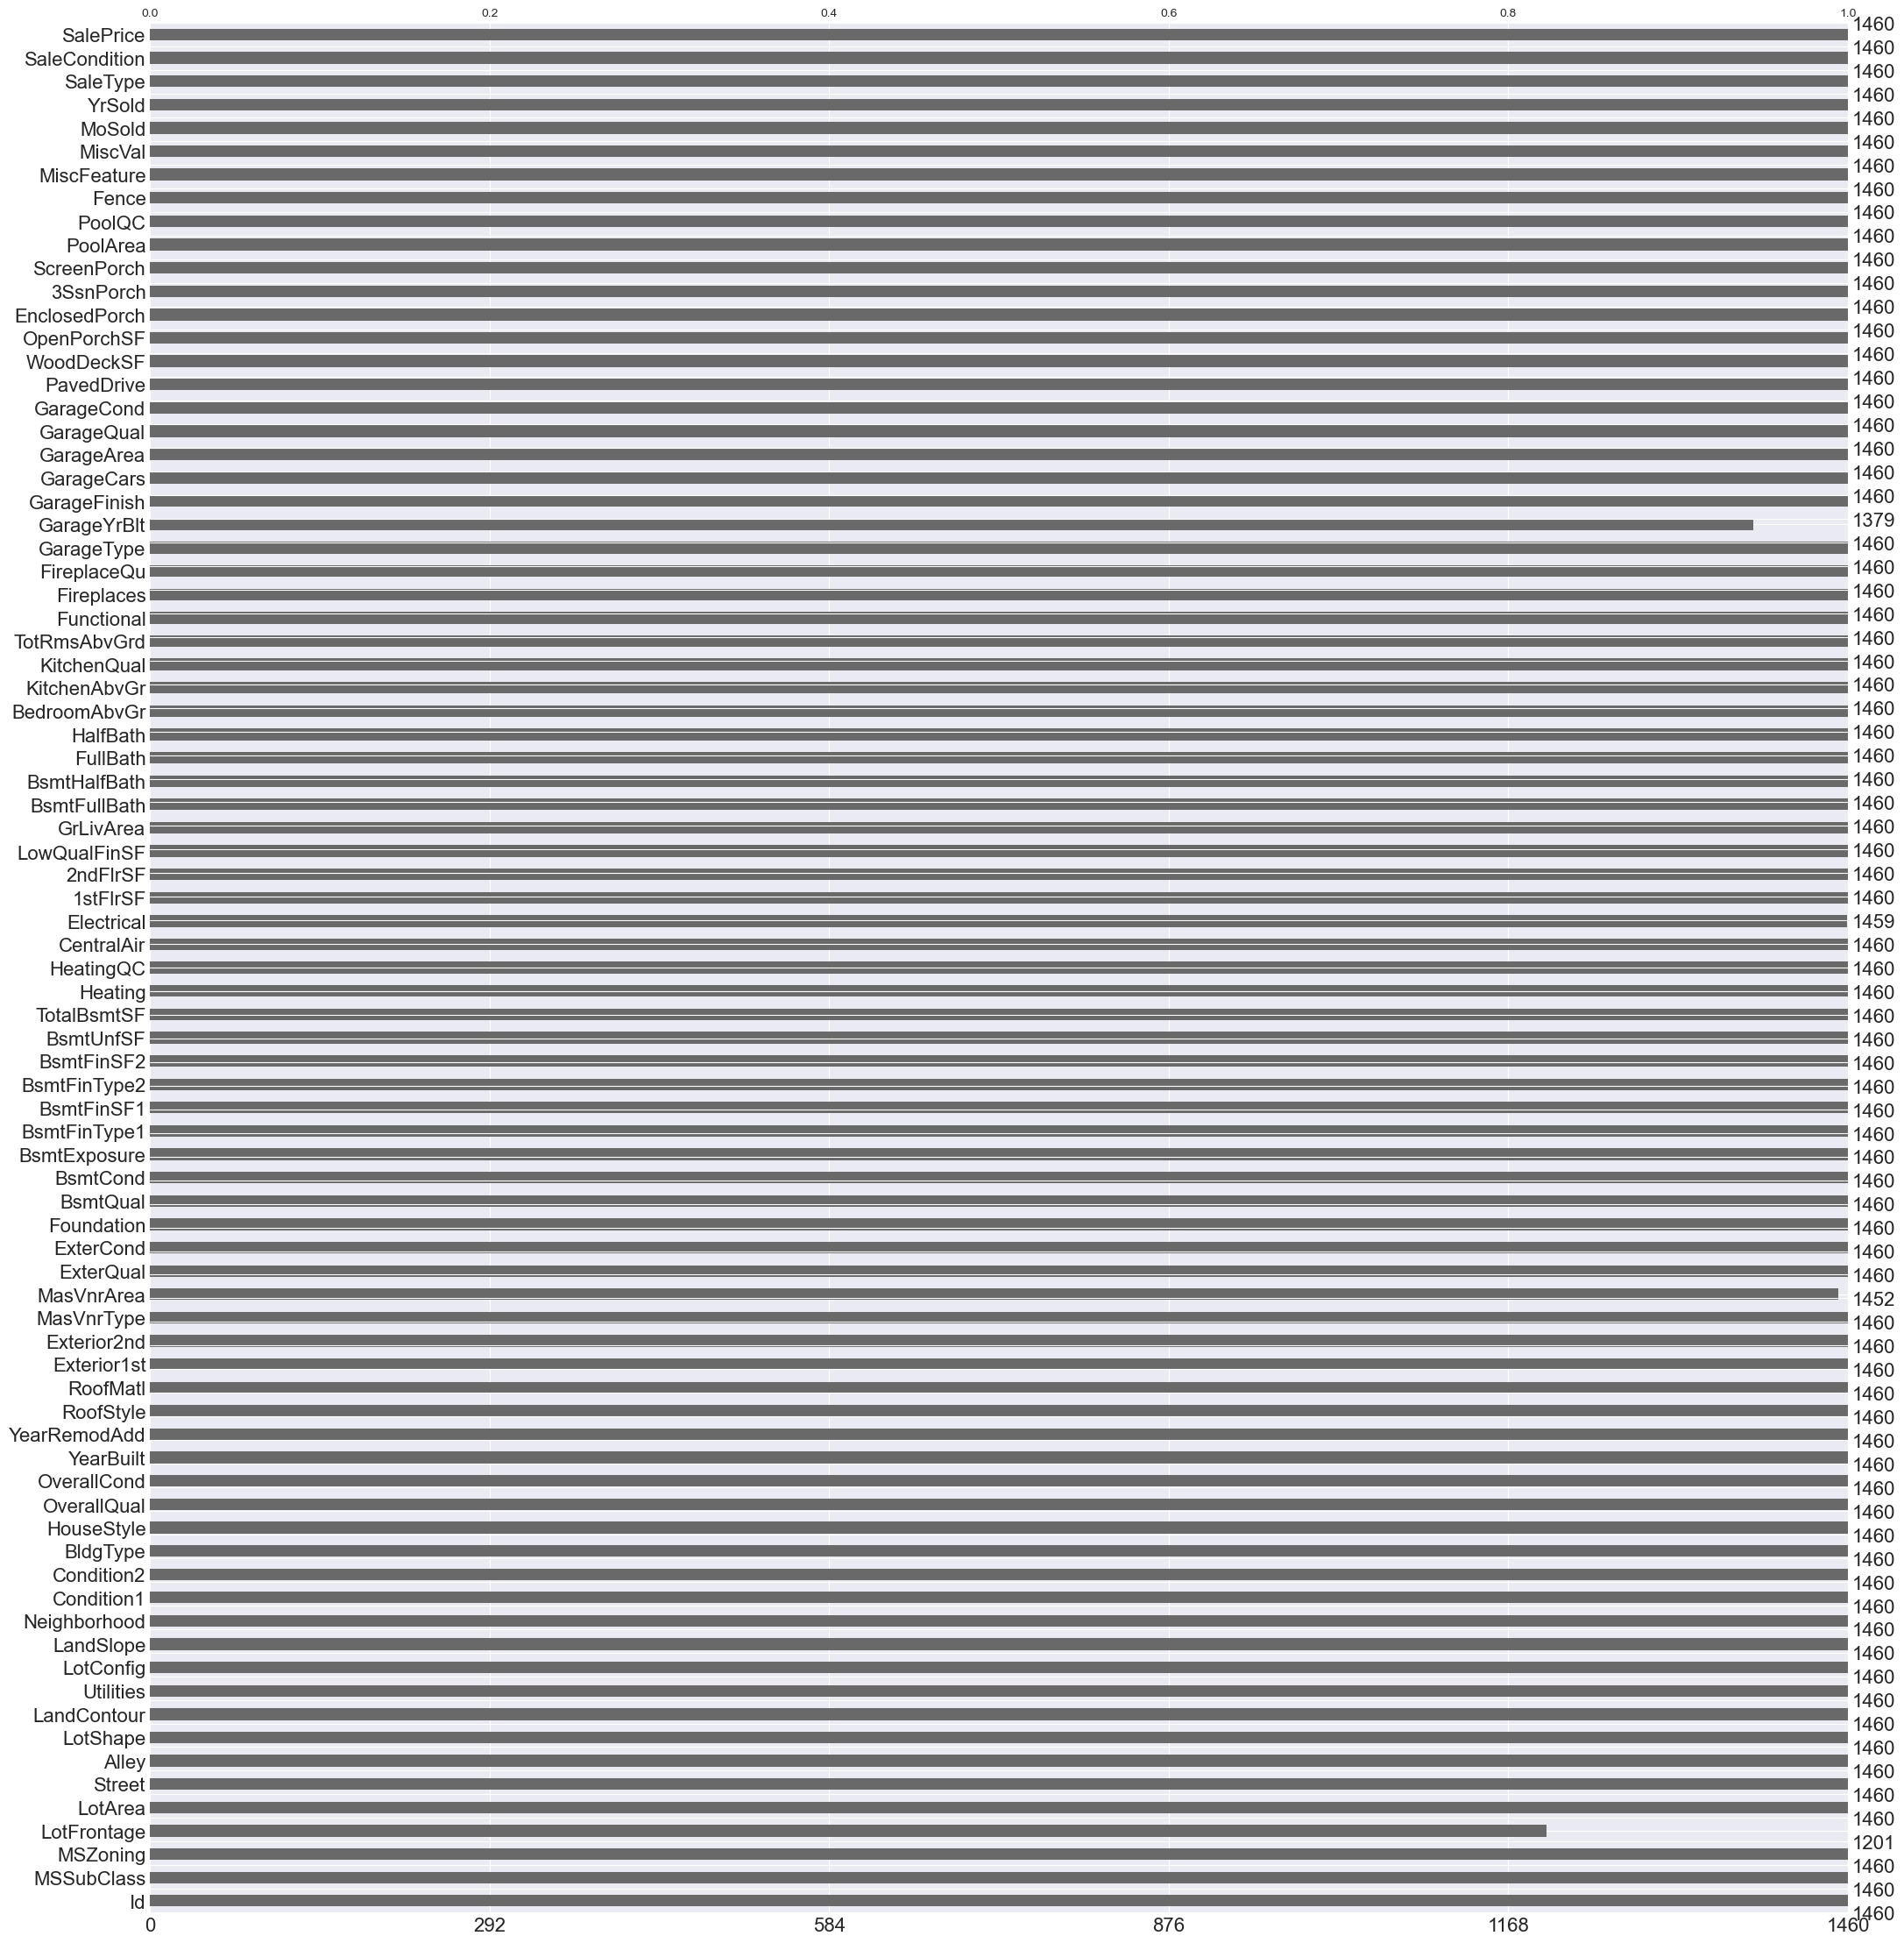

In [165]:
msno.bar(df)

In [166]:
df = df.dropna()

In [181]:
GroupedData=df.groupby(by='MSZoning').size()
print(GroupedData)
GroupedData=df.groupby(by='Neighborhood').size()
print(GroupedData)
GroupedData=df.groupby(by='MiscFeature').size()
print(GroupedData)
GroupedData=df.groupby(by='CentralAir').size()
print(GroupedData)
GroupedData=df.groupby(by='RoofMatl').size()
print(GroupedData)
GroupedData=df.groupby(by='BsmtQual').size()
print(GroupedData)

MSZoning
C (all)      8
FV          54
RH          10
RL         873
RM         175
dtype: int64
Neighborhood
Blmngtn     14
Blueste      2
BrDale      15
BrkSide     42
ClearCr     12
CollgCr    123
Crawfor     41
Edwards     71
Gilbert     49
IDOTRR      27
MeadowV     10
Mitchel     32
NAmes      181
NPkVill      7
NWAmes      45
NoRidge     33
NridgHt     75
OldTown     97
SWISU       19
Sawyer      46
SawyerW     48
Somerst     75
StoneBr     20
Timber      29
Veenker      7
dtype: int64
MiscFeature
Na      1084
Othr       1
Shed      34
TenC       1
dtype: int64
CentralAir
N      63
Y    1057
dtype: int64
RoofMatl
ClyTile       1
CompShg    1103
Membran       1
Roll          1
Tar&Grv       6
WdShake       2
WdShngl       6
dtype: int64
BsmtQual
Ex    113
Fa     32
Gd    465
Na     24
TA    486
dtype: int64


In [161]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Na,Reg,Lvl,AllPub,...,0,5.0,Na,Na,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Na,Reg,Lvl,AllPub,...,0,5.0,Na,Na,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Na,IR1,Lvl,AllPub,...,0,5.0,Na,Na,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Na,IR1,Lvl,AllPub,...,0,5.0,Na,Na,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Na,IR1,Lvl,AllPub,...,0,5.0,Na,Na,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Na,Reg,Lvl,AllPub,...,0,5.0,Na,Na,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Na,Reg,Lvl,AllPub,...,0,5.0,MnPrv,Na,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Na,Reg,Lvl,AllPub,...,0,5.0,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Na,Reg,Lvl,AllPub,...,0,5.0,Na,Na,0,4,2010,WD,Normal,142125


In [162]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = df.select_dtypes(include=numerics)

# ['Id','MSSubClass','OverallQual','OverallCond']
# They have numerical data type but they dont represent numerial value 
numeric = numeric.drop(columns=['Id','MSSubClass','OverallQual','OverallCond'])
numeric.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,2003,2003,196.0,1.0,2.0,1.0,2.0,3.0,...,61,0,0,0,0,5.0,0,2,2008,208500
1,80.0,9600,1976,1976,0.0,2.0,2.0,1.0,2.0,0.0,...,0,0,0,0,0,5.0,0,5,2007,181500
2,68.0,11250,2001,2002,162.0,1.0,2.0,1.0,2.0,2.0,...,42,0,0,0,0,5.0,0,9,2008,223500
3,60.0,9550,1915,1970,0.0,2.0,2.0,2.0,1.0,3.0,...,35,272,0,0,0,5.0,0,2,2006,140000
4,84.0,14260,2000,2000,350.0,1.0,2.0,1.0,2.0,1.0,...,84,0,0,0,0,5.0,0,12,2008,250000


In [57]:
ordnial = df
enc = OrdinalEncoder(categories=[['Ex','Gd','TA','Fa','Po','Na']])

ordnial['ExterQual'] = enc.fit_transform(ordnial.loc[:,['ExterQual']])
ordnial['ExterCond'] = enc.fit_transform(ordnial.loc[:,['ExterCond']])
ordnial['BsmtQual'] = enc.fit_transform(ordnial.loc[:,['BsmtQual']])
ordnial['BsmtCond'] = enc.fit_transform(ordnial.loc[:,['BsmtCond']])
ordnial['HeatingQC'] = enc.fit_transform(ordnial.loc[:,['HeatingQC']])
ordnial['KitchenQual'] = enc.fit_transform(ordnial.loc[:,['KitchenQual']])
ordnial['GarageQual'] = enc.fit_transform(ordnial.loc[:,['GarageQual']])
ordnial['GarageCond'] = enc.fit_transform(ordnial.loc[:,['GarageCond']])
ordnial['FireplaceQu'] = enc.fit_transform(ordnial.loc[:,['FireplaceQu']])
ordnial['PoolQC'] = enc.fit_transform(ordnial.loc[:,['PoolQC']])


enc = OrdinalEncoder(categories=[['GLQ','ALQ','BLQ','Rec','LwQ','Unf','Na']])
ordnial['BsmtFinType1'] = enc.fit_transform(ordnial.loc[:,['BsmtFinType1']])
ordnial['BsmtFinType2'] = enc.fit_transform(ordnial.loc[:,['BsmtFinType2']])

enc = OrdinalEncoder(categories=[['Gd','Av','Mn','No','Na']])
ordnial['BsmtExposure'] = enc.fit_transform(ordnial.loc[:,['BsmtExposure']])

In [60]:
to_exclude = list(numeric.columns.values)
ordnial = df.drop(columns=to_exclude)

ordnial = ordnial.select_dtypes(include=numerics)
ordnial = ordnial.drop(columns=['Id','MSSubClass'])
ordnial["SalePrice"] = df['SalePrice']
ordnial.head()

,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC,SalePrice
0,7,5,1.0,2.0,1.0,2.0,3.0,0.0,5.0,0.0,1.0,5.0,2.0,2.0,5.0,208500
1,6,8,2.0,2.0,1.0,2.0,0.0,1.0,5.0,0.0,2.0,2.0,2.0,2.0,5.0,181500
2,7,5,1.0,2.0,1.0,2.0,2.0,0.0,5.0,0.0,1.0,2.0,2.0,2.0,5.0,223500
3,7,5,2.0,2.0,2.0,1.0,3.0,1.0,5.0,1.0,1.0,1.0,2.0,2.0,5.0,140000
4,8,5,1.0,2.0,1.0,2.0,1.0,0.0,5.0,0.0,1.0,2.0,2.0,2.0,5.0,250000


OverallQual    0.827558
ExterQual     -0.712175
BsmtQual      -0.718460
HeatingQC     -0.533440
KitchenQual   -0.689582
FireplaceQu   -0.528840
SalePrice      1.000000
Name: SalePrice, dtype: float64

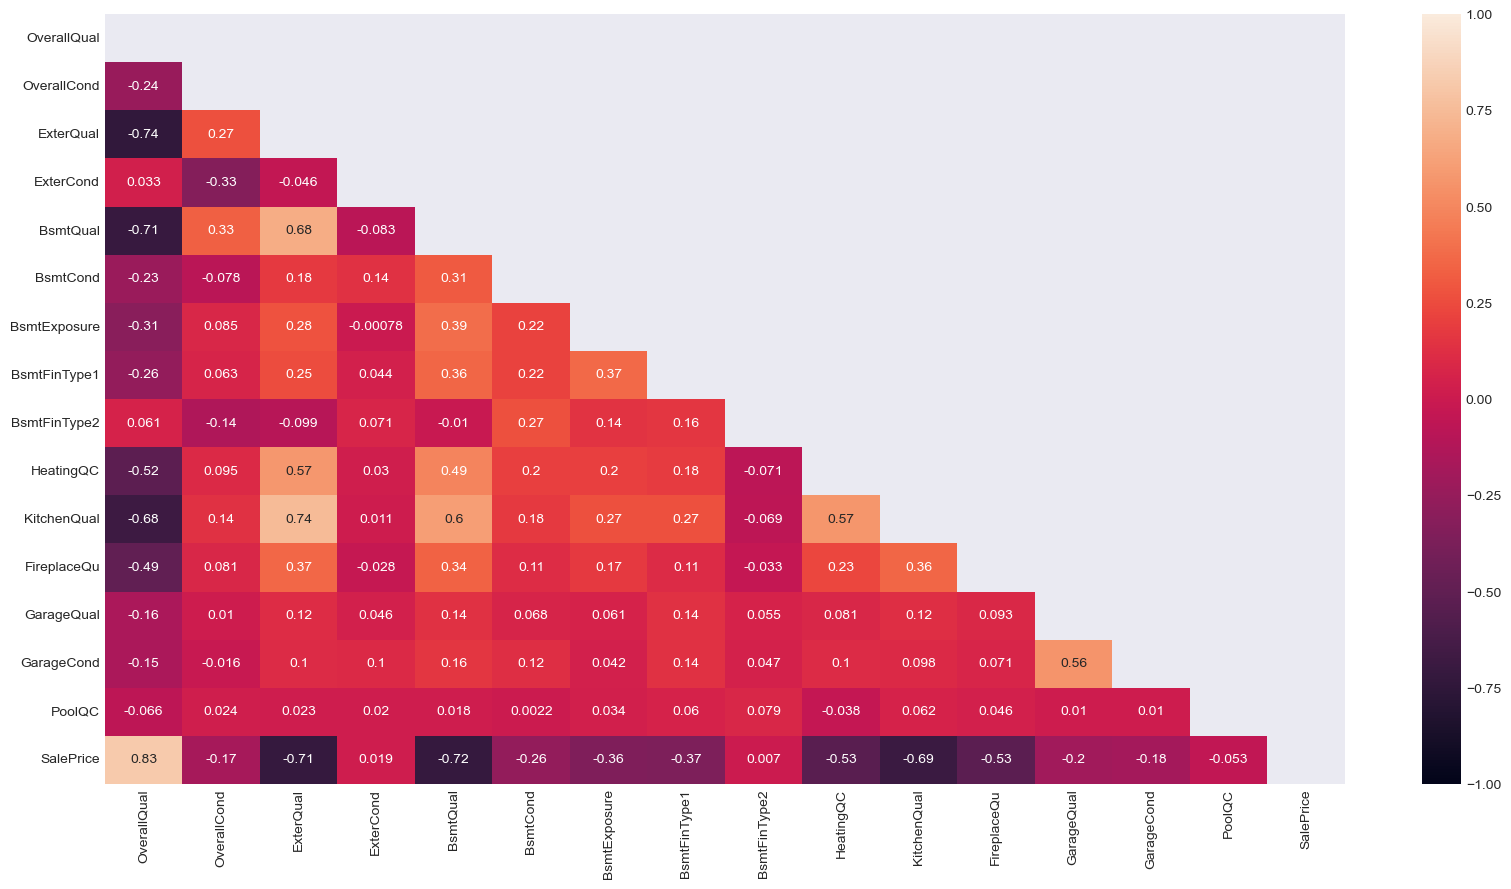

In [61]:
corr_ord= ordnial.corr(method='spearman')
matrix = np.triu(corr_ord)

plt.figure(figsize=(20,10))
heatmap = sns.heatmap(corr_ord, vmin=-1, 
                  vmax=1, annot=True,mask=matrix)
corr_ord = corr_ord.loc[(corr_ord['SalePrice'] > 0.4) | (corr_ord['SalePrice'] < -0.4)]
corr_ord = corr_ord['SalePrice']
corr_ord

In [68]:
od = ['OverallQual', 'ExterQual', 'BsmtQual', 'HeatingQC', 'KitchenQual','FireplaceQu']

In [64]:
cat = df
to_exclude = list(numeric.columns.values)
tmp = list(ordnial.drop(columns=['SalePrice']).columns.values)
cat = cat.drop(columns=to_exclude)
cat = cat.drop(columns=tmp)
cat["SalePrice"] = df['SalePrice']


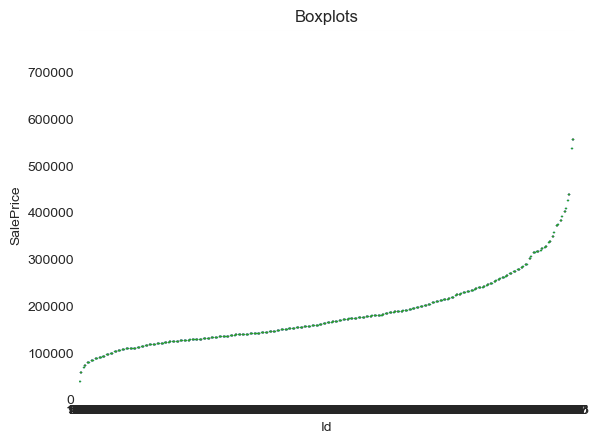

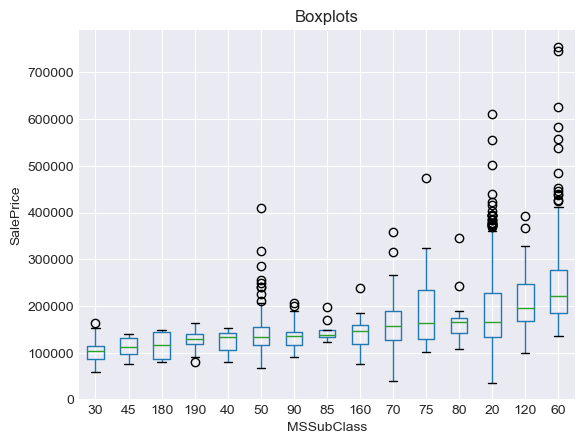

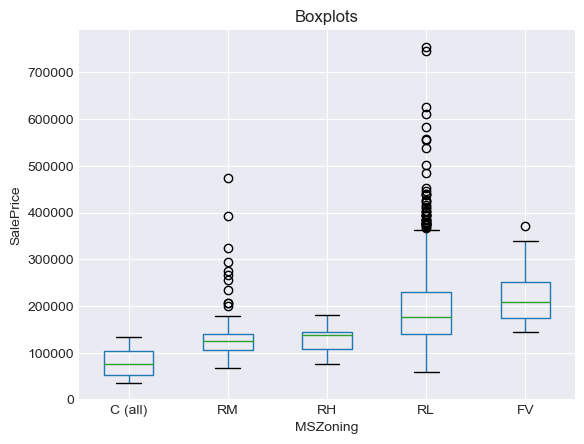

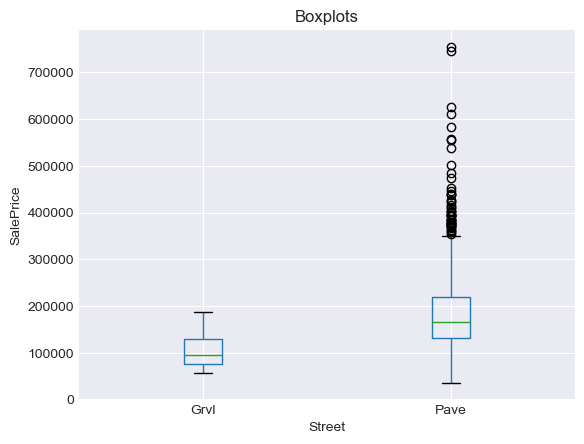

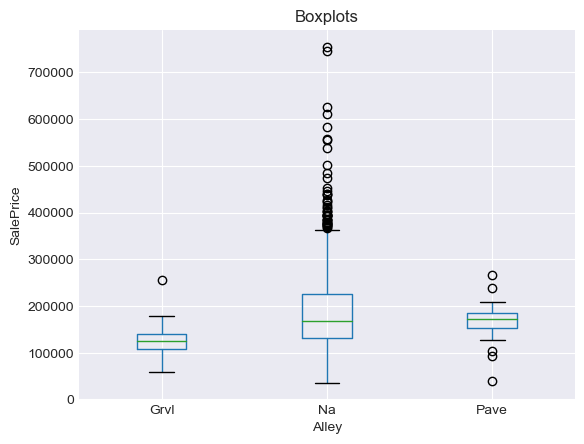

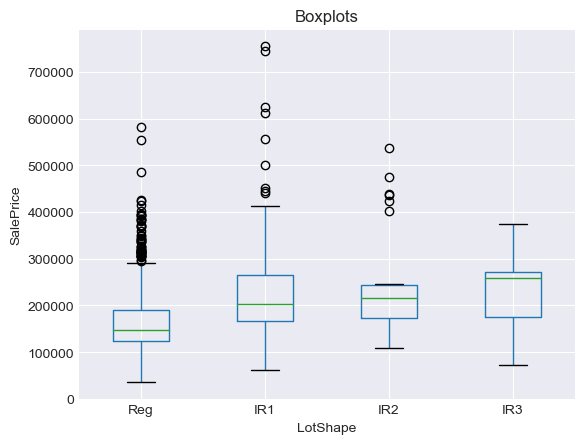

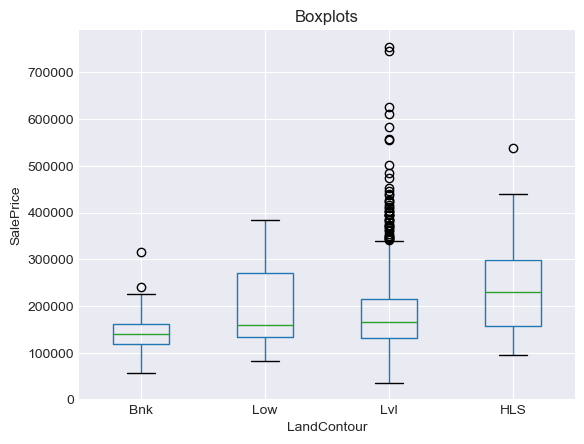

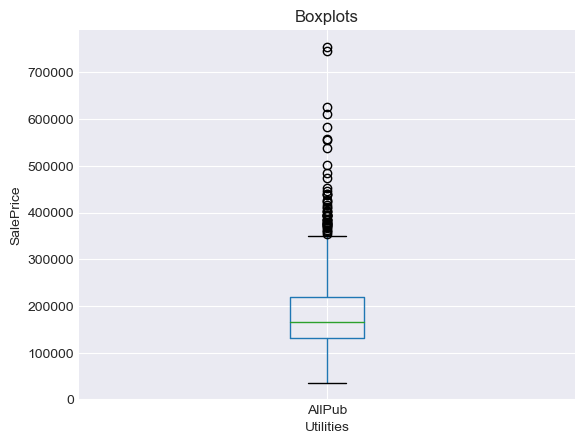

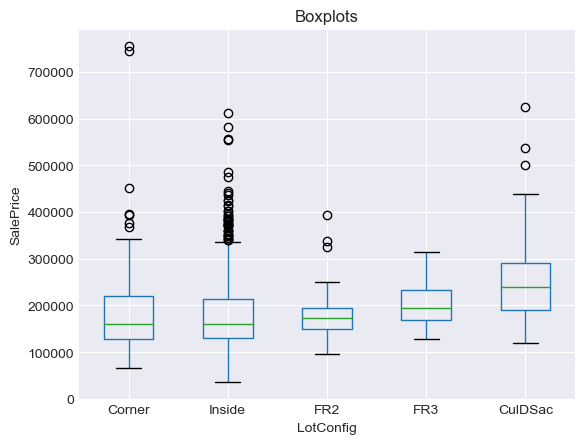

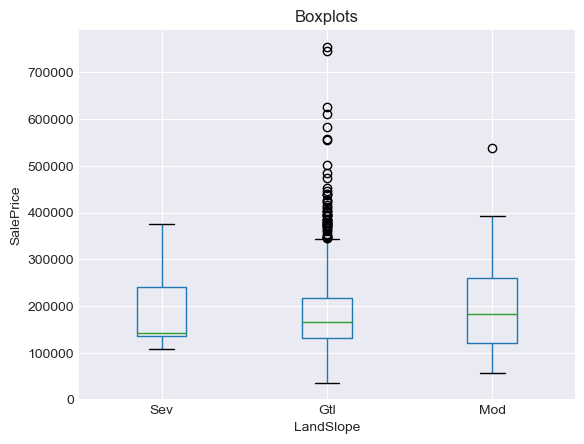

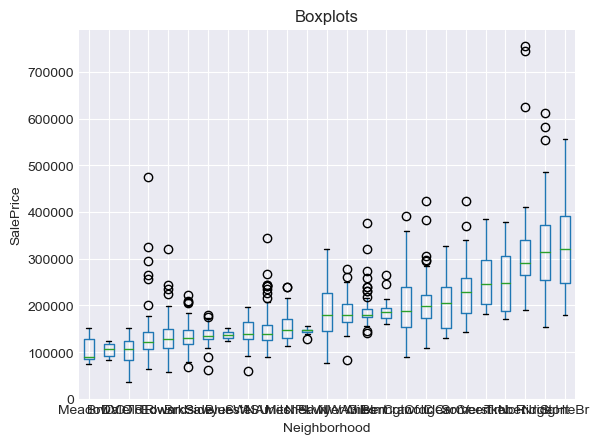

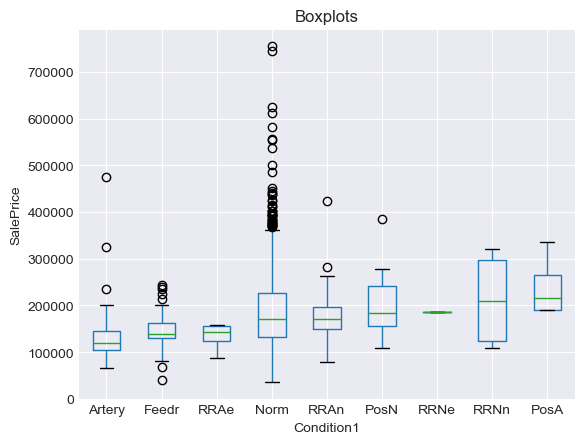

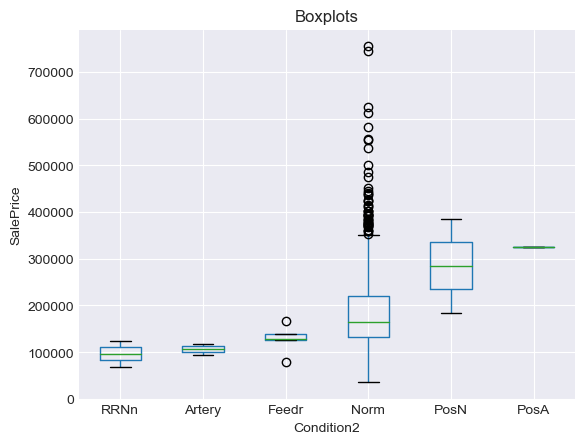

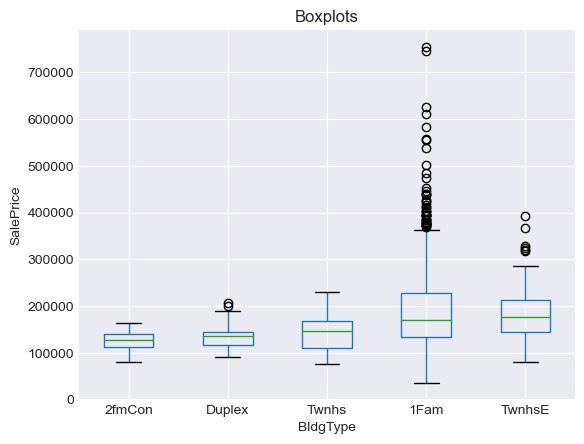

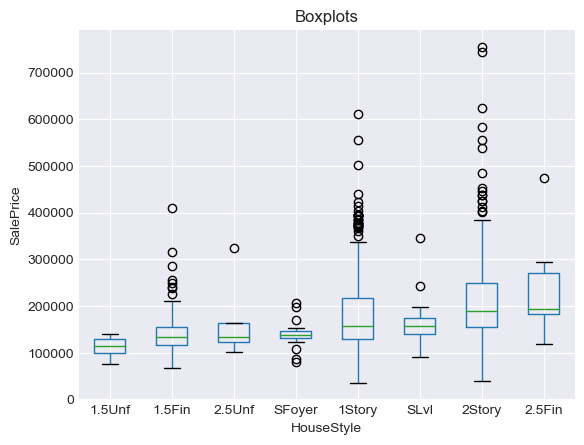

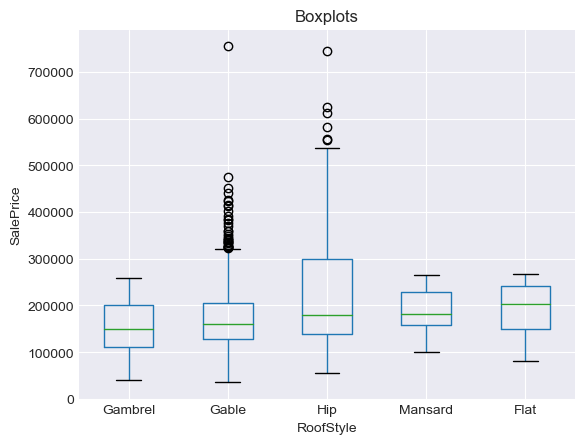

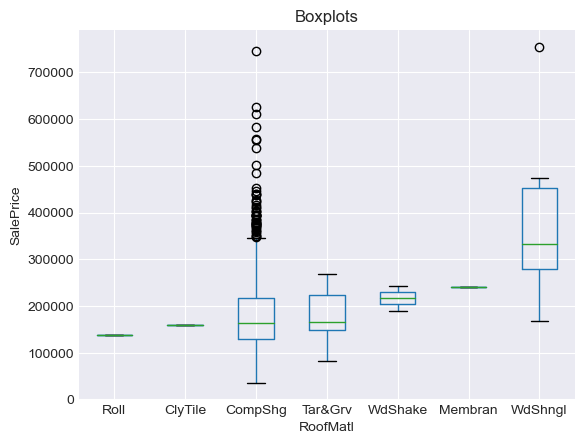

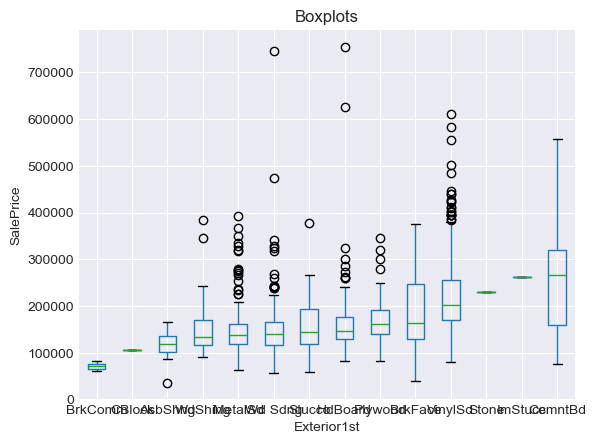

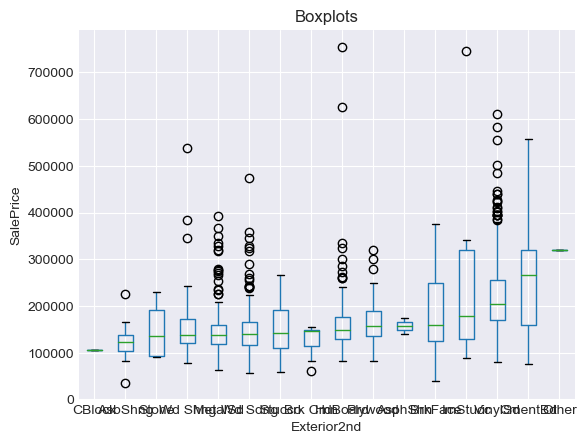

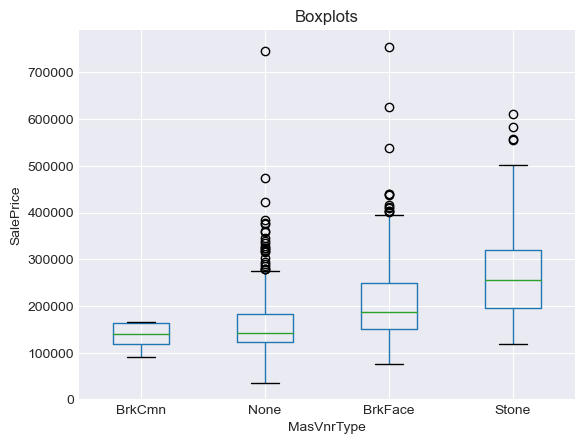

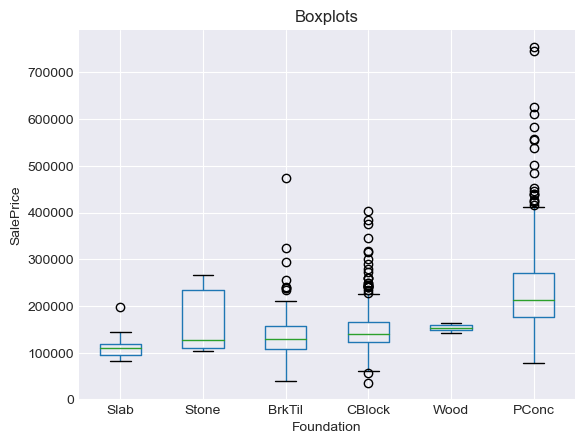

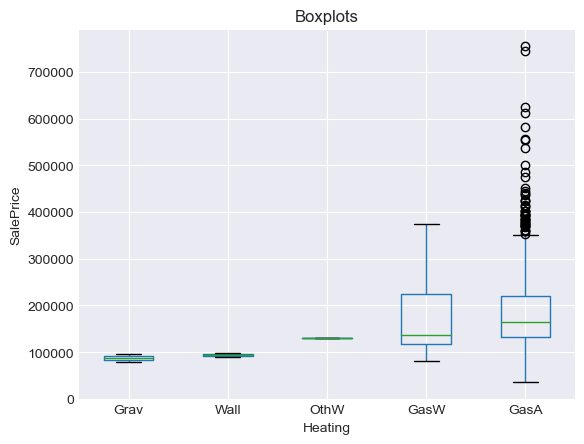

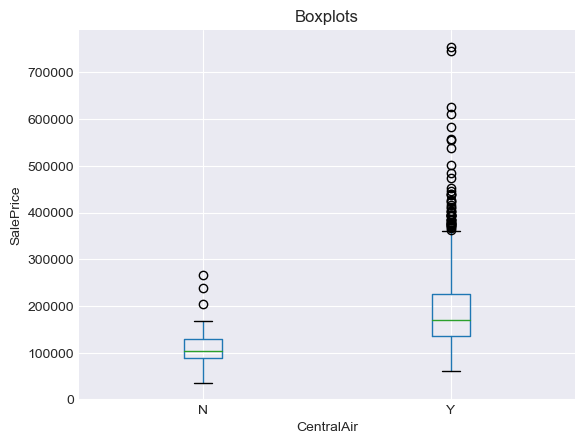

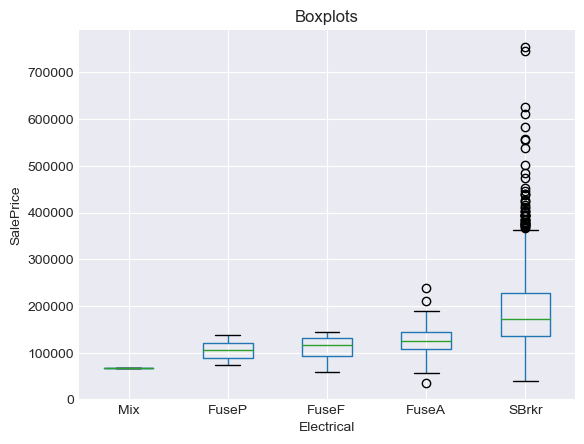

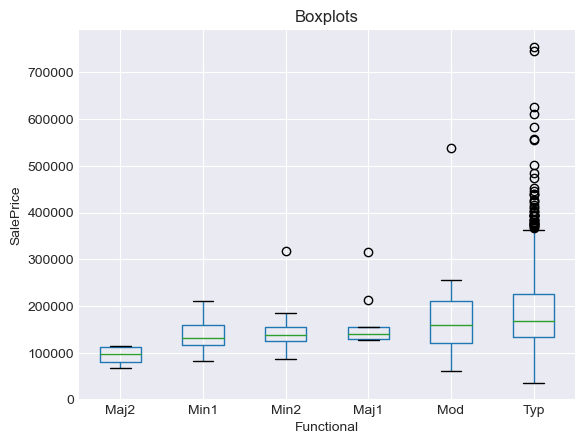

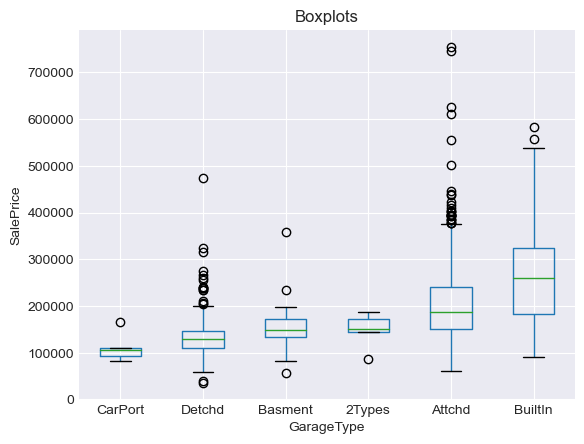

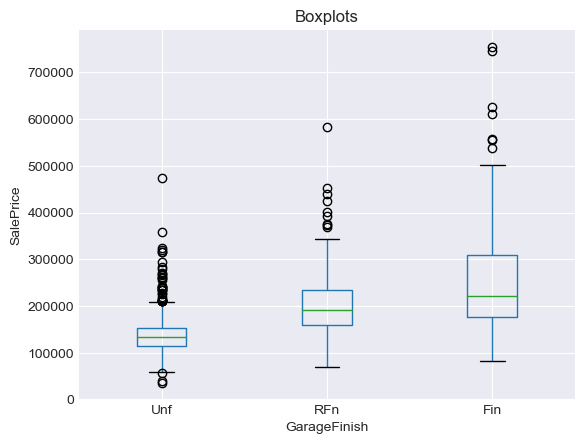

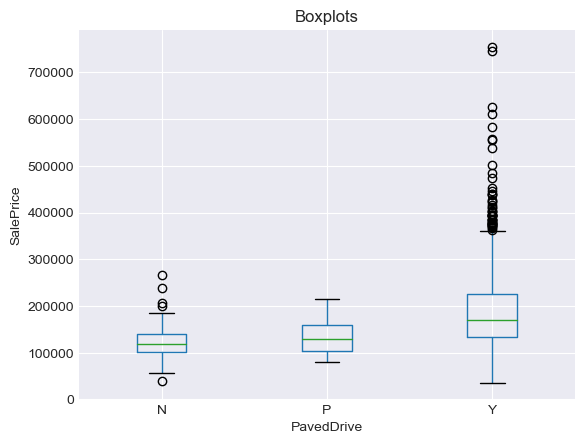

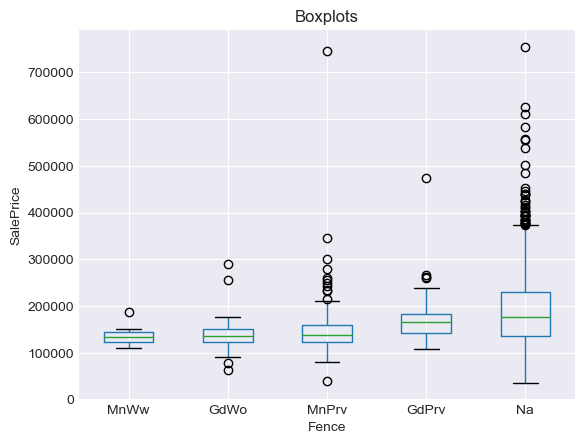

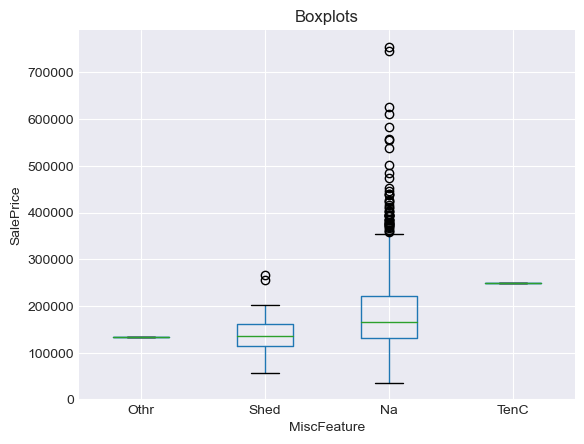

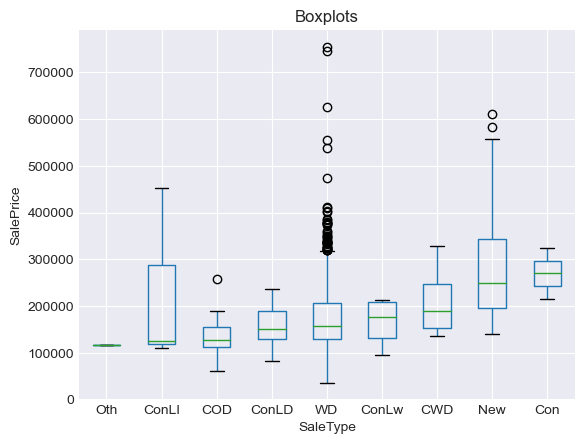

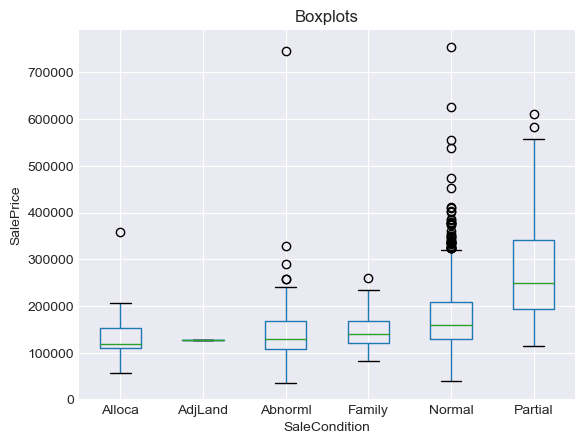

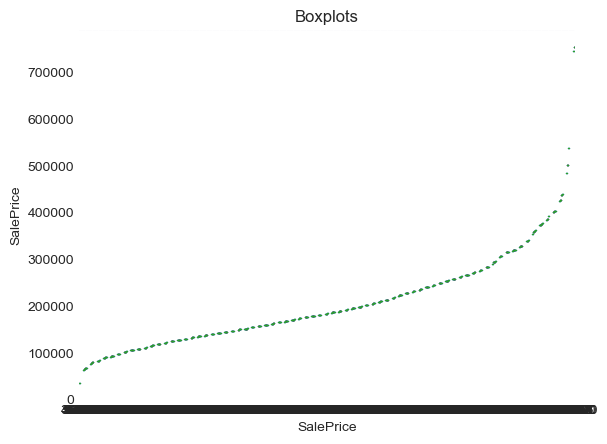

In [65]:
def boxplot_sorted(df, by, column, rot=0):

    df2 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
    meds = df2.median().sort_values()

    return df2[meds.index].boxplot(rot=rot, return_type="axes")

for name, values in cat.iteritems():
    axes = boxplot_sorted(cat,  by=name, column='SalePrice', rot=0)
    plt.xlabel(name)
    plt.ylabel('SalePrice')
    plt.title('Boxplots')
    plt.show()

In [41]:
# ordnial = df
# enc = OrdinalEncoder(categories=[['Ex','Gd','TA','Fa','Po','Na']])

# ordnial['ExterQual'] = enc.fit_transform(ordnial.loc[:,['ExterQual']])
# ordnial['ExterCond'] = enc.fit_transform(ordnial.loc[:,['ExterCond']])
# ordnial['BsmtQual'] = enc.fit_transform(ordnial.loc[:,['BsmtQual']])
# ordnial['BsmtCond'] = enc.fit_transform(ordnial.loc[:,['BsmtCond']])
# ordnial['HeatingQC'] = enc.fit_transform(ordnial.loc[:,['HeatingQC']])
# ordnial['KitchenQual'] = enc.fit_transform(ordnial.loc[:,['KitchenQual']])
# ordnial['GarageQual'] = enc.fit_transform(ordnial.loc[:,['GarageQual']])
# ordnial['GarageCond'] = enc.fit_transform(ordnial.loc[:,['GarageCond']])
# ordnial['FireplaceQu'] = enc.fit_transform(ordnial.loc[:,['FireplaceQu']])
# ordnial['PoolQC'] = enc.fit_transform(ordnial.loc[:,['PoolQC']])


# enc = OrdinalEncoder(categories=[['GLQ','ALQ','BLQ','Rec','LwQ','Unf','Na']])
# ordnial['BsmtFinType1'] = enc.fit_transform(ordnial.loc[:,['BsmtFinType1']])
# ordnial['BsmtFinType2'] = enc.fit_transform(ordnial.loc[:,['BsmtFinType2']])

# enc = OrdinalEncoder(categories=[['Gd','Av','Mn','No','Na']])
# ordnial['BsmtExposure'] = enc.fit_transform(ordnial.loc[:,['BsmtExposure']])


In [140]:
attributes = ['YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'Fireplaces', 'GarageCars', 'OverallQual', 'ExterQual', 'BsmtQual', 'HeatingQC', 'KitchenQual','FireplaceQu']
attributes.extend(['MSZoning','Street','Neighborhood','Condition2','RoofMatl','CentralAir','GarageFinish','MiscFeature','SalePrice'])

len(attributes)

24

In [141]:

ordnial.head()

,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC,SalePrice
0,7,5,1.0,2.0,1.0,2.0,3.0,0.0,5.0,0.0,1.0,5.0,2.0,2.0,5.0,208500
1,6,8,2.0,2.0,1.0,2.0,0.0,1.0,5.0,0.0,2.0,2.0,2.0,2.0,5.0,181500
2,7,5,1.0,2.0,1.0,2.0,2.0,0.0,5.0,0.0,1.0,2.0,2.0,2.0,5.0,223500
3,7,5,2.0,2.0,2.0,1.0,3.0,1.0,5.0,1.0,1.0,1.0,2.0,2.0,5.0,140000
4,8,5,1.0,2.0,1.0,2.0,1.0,0.0,5.0,0.0,1.0,2.0,2.0,2.0,5.0,250000


In [142]:

df[od] = ordnial[od]
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Na,Reg,Lvl,AllPub,...,0,5.0,Na,Na,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Na,Reg,Lvl,AllPub,...,0,5.0,Na,Na,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Na,IR1,Lvl,AllPub,...,0,5.0,Na,Na,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Na,IR1,Lvl,AllPub,...,0,5.0,Na,Na,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Na,IR1,Lvl,AllPub,...,0,5.0,Na,Na,0,12,2008,WD,Normal,250000


In [143]:
X = df[attributes]
# Y = df['SalePrice']
X

,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,Fireplaces,GarageCars,OverallQual,...,FireplaceQu,MSZoning,Street,Neighborhood,Condition2,RoofMatl,CentralAir,GarageFinish,MiscFeature,SalePrice
0,2003,2003,196.0,856,856,1710,2,0,2,7,...,5.0,RL,Pave,CollgCr,Norm,CompShg,Y,RFn,Na,208500
1,1976,1976,0.0,1262,1262,1262,2,1,2,6,...,2.0,RL,Pave,Veenker,Norm,CompShg,Y,RFn,Na,181500
2,2001,2002,162.0,920,920,1786,2,1,2,7,...,2.0,RL,Pave,CollgCr,Norm,CompShg,Y,RFn,Na,223500
3,1915,1970,0.0,756,961,1717,1,1,3,7,...,1.0,RL,Pave,Crawfor,Norm,CompShg,Y,Unf,Na,140000
4,2000,2000,350.0,1145,1145,2198,2,1,3,8,...,2.0,RL,Pave,NoRidge,Norm,CompShg,Y,RFn,Na,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1999,2000,0.0,953,953,1647,2,1,2,6,...,2.0,RL,Pave,Gilbert,Norm,CompShg,Y,RFn,Na,175000
1456,1978,1988,119.0,1542,2073,2073,2,2,2,6,...,2.0,RL,Pave,NWAmes,Norm,CompShg,Y,Unf,Na,210000
1457,1941,2006,0.0,1152,1188,2340,2,2,1,7,...,1.0,RL,Pave,Crawfor,Norm,CompShg,Y,RFn,Shed,266500
1458,1950,1996,0.0,1078,1078,1078,1,0,1,5,...,5.0,RL,Pave,NAmes,Norm,CompShg,Y,Unf,Na,142125


In [144]:
num = ['YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'Fireplaces',
 'GarageCars','SalePrice']
scaler = StandardScaler()
# scaler = scaler.fit(X[num])
X[num] = scaler.fit_transform(X[num])
Y = X['SalePrice']


C:\Users\malkhathery\AppData\Local\Temp\ipykernel_16876\2543676078.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[num] = scaler.fit_transform(X[num])


In [145]:
attributes.remove('SalePrice')
df_test = pd.read_csv('House_prediction_dataset/test.csv')
X_test = df_test[attributes]

Y_test = pd.read_csv('House_prediction_dataset/sample_submission.csv')
Y_test = Y_test['SalePrice']

In [146]:

X_test['SalePrice'] = Y_test
# X_test[num] = scaler.transform(X_test[num])
X_test

C:\Users\malkhathery\AppData\Local\Temp\ipykernel_16876\2705664601.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['SalePrice'] = Y_test


,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,Fireplaces,GarageCars,OverallQual,...,FireplaceQu,MSZoning,Street,Neighborhood,Condition2,RoofMatl,CentralAir,GarageFinish,MiscFeature,SalePrice
0,1961,1961,0.0,882.0,896,896,1,0,1.0,5,...,NaN,RH,Pave,NAmes,Norm,CompShg,Y,Unf,NaN,169277.052498
1,1958,1958,108.0,1329.0,1329,1329,1,0,1.0,6,...,NaN,RL,Pave,NAmes,Norm,CompShg,Y,Unf,Gar2,187758.393989
2,1997,1998,0.0,928.0,928,1629,2,1,2.0,5,...,TA,RL,Pave,Gilbert,Norm,CompShg,Y,Fin,NaN,183583.683570
3,1998,1998,20.0,926.0,926,1604,2,1,2.0,6,...,Gd,RL,Pave,Gilbert,Norm,CompShg,Y,Fin,NaN,179317.477511
4,1992,1992,0.0,1280.0,1280,1280,2,0,2.0,8,...,NaN,RL,Pave,StoneBr,Norm,CompShg,Y,RFn,NaN,150730.079977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1970,1970,0.0,546.0,546,1092,1,0,0.0,4,...,NaN,RM,Pave,MeadowV,Norm,CompShg,Y,NaN,NaN,167081.220949
1455,1970,1970,0.0,546.0,546,1092,1,0,1.0,4,...,NaN,RM,Pave,MeadowV,Norm,CompShg,Y,Unf,NaN,164788.778231
1456,1960,1996,0.0,1224.0,1224,1224,1,1,2.0,5,...,TA,RL,Pave,Mitchel,Norm,CompShg,Y,Unf,NaN,219222.423400
1457,1992,1992,0.0,912.0,970,970,1,0,0.0,5,...,NaN,RL,Pave,Mitchel,Norm,CompShg,Y,NaN,Shed,184924.279659


In [147]:
X_test[num] = scaler.transform(X_test[num])

C:\Users\malkhathery\AppData\Local\Temp\ipykernel_16876\894634319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[num] = scaler.transform(X_test[num])


In [148]:
od = ['OverallQual','ExterQual','BsmtQual','HeatingQC','KitchenQual','FireplaceQu']
enc = OrdinalEncoder(categories=[['Ex','Gd','TA','Fa','Po','Na']])
X_test[od] = X_test[od].fillna('Na')

X_test['ExterQual'] = enc.fit_transform(X_test.loc[:,['ExterQual']])
X_test['BsmtQual'] = enc.fit_transform(X_test.loc[:,['BsmtQual']])
X_test['HeatingQC'] = enc.fit_transform(X_test.loc[:,['HeatingQC']])
X_test['KitchenQual'] = enc.fit_transform(X_test.loc[:,['KitchenQual']])
X_test['FireplaceQu'] = enc.fit_transform(X_test.loc[:,['FireplaceQu']])
X_test["MiscFeature"] =  X_test["MiscFeature"].fillna("Na")


C:\Users\malkhathery\AppData\Local\Temp\ipykernel_16876\1953992670.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[od] = X_test[od].fillna('Na')
C:\Users\malkhathery\AppData\Local\Temp\ipykernel_16876\1953992670.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['ExterQual'] = enc.fit_transform(X_test.loc[:,['ExterQual']])
C:\Users\malkhathery\AppData\Local\Temp\ipykernel_16876\1953992670.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [149]:
X_test

,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,Fireplaces,GarageCars,OverallQual,...,FireplaceQu,MSZoning,Street,Neighborhood,Condition2,RoofMatl,CentralAir,GarageFinish,MiscFeature,SalePrice
0,-0.362984,-1.173578,-0.573088,-0.439679,-0.720156,-1.213528,-1.055245,-0.955979,-1.342760,5,...,5.0,RH,Pave,NAmes,Norm,CompShg,Y,Unf,Na,-0.195731
1,-0.459910,-1.316324,-0.003087,0.564421,0.401692,-0.386731,-1.055245,-0.955979,-1.342760,6,...,5.0,RL,Pave,NAmes,Norm,CompShg,Y,Unf,Gar2,0.026943
2,0.800134,0.586959,-0.573088,-0.336349,-0.637248,0.186108,0.763023,0.625552,0.185585,5,...,2.0,RL,Pave,Gilbert,Norm,CompShg,Y,Fin,Na,-0.023357
3,0.832442,0.586959,-0.467532,-0.340841,-0.642430,0.138371,0.763023,0.625552,0.185585,6,...,1.0,RL,Pave,Gilbert,Norm,CompShg,Y,Fin,Na,-0.074758
4,0.638590,0.301466,-0.573088,0.454352,0.274739,-0.480294,0.763023,-0.955979,0.185585,8,...,5.0,RL,Pave,StoneBr,Norm,CompShg,Y,RFn,Na,-0.419196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-0.072204,-0.745339,-0.573088,-1.194439,-1.626961,-0.839273,-1.055245,-0.955979,-2.871104,4,...,5.0,RM,Pave,MeadowV,Norm,CompShg,Y,NaN,Na,-0.222188
1455,-0.072204,-0.745339,-0.573088,-1.194439,-1.626961,-0.839273,-1.055245,-0.955979,-1.342760,4,...,5.0,RM,Pave,MeadowV,Norm,CompShg,Y,Unf,Na,-0.249808
1456,-0.395293,0.491795,-0.573088,0.328559,0.129650,-0.587224,-1.055245,0.625552,0.185585,5,...,2.0,RL,Pave,Mitchel,Norm,CompShg,Y,Unf,Na,0.406039
1457,0.638590,0.301466,-0.573088,-0.372290,-0.528431,-1.072228,-1.055245,-0.955979,-2.871104,5,...,5.0,RL,Pave,Mitchel,Norm,CompShg,Y,NaN,Shed,-0.007204


In [150]:
X

,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,Fireplaces,GarageCars,OverallQual,...,FireplaceQu,MSZoning,Street,Neighborhood,Condition2,RoofMatl,CentralAir,GarageFinish,MiscFeature,SalePrice
0,0.993986,0.824869,0.461359,-0.498083,-0.823791,0.340774,0.763023,-0.955979,0.185585,7,...,5.0,RL,Pave,CollgCr,Norm,CompShg,Y,RFn,Na,0.276849
1,0.121648,-0.459847,-0.573088,0.413919,0.228103,-0.514665,0.763023,0.625552,0.185585,6,...,2.0,RL,Pave,Veenker,Norm,CompShg,Y,RFn,Na,-0.048462
2,0.929369,0.777287,0.281914,-0.354319,-0.657975,0.485893,0.763023,0.625552,0.185585,7,...,2.0,RL,Pave,CollgCr,Norm,CompShg,Y,RFn,Na,0.457578
3,-1.849189,-0.745339,-0.573088,-0.722714,-0.551749,0.354140,-1.055245,0.625552,1.713929,7,...,1.0,RL,Pave,Crawfor,Norm,CompShg,Y,Unf,Na,-0.548478
4,0.897060,0.682123,1.274139,0.151100,-0.075029,1.272591,0.763023,0.625552,1.713929,8,...,2.0,RL,Pave,NoRidge,Norm,CompShg,Y,RFn,Na,0.776865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.864751,0.682123,-0.573088,-0.280191,-0.572476,0.220478,0.763023,0.625552,0.185585,6,...,2.0,RL,Pave,Gilbert,Norm,CompShg,Y,RFn,Na,-0.126778
1456,0.186266,0.111138,0.054969,1.042885,2.329300,1.033909,0.763023,2.207083,0.185585,6,...,2.0,RL,Pave,NWAmes,Norm,CompShg,Y,Unf,Na,0.294922
1457,-1.009160,0.967616,-0.573088,0.166825,0.036379,1.543735,0.763023,2.207083,-1.342760,7,...,1.0,RL,Pave,Crawfor,Norm,CompShg,Y,RFn,Shed,0.975666
1458,-0.718381,0.491795,-0.573088,0.000598,-0.248617,-0.866006,-1.055245,-0.955979,-1.342760,5,...,5.0,RL,Pave,NAmes,Norm,CompShg,Y,Unf,Na,-0.522874


In [151]:
Y = X['SalePrice']
Y_test = X_test['SalePrice']

In [152]:
# one-hot encoding
X = pd.get_dummies(data=X, drop_first=True)
X_test= pd.get_dummies(data=X_test, drop_first=True)
X, X_test = X.align(X_test, join='left', axis=1)
X_test = X_test.fillna(int(0))

In [153]:
X_test

,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,Fireplaces,GarageCars,OverallQual,...,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,CentralAir_Y,GarageFinish_RFn,GarageFinish_Unf,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
0,-0.362984,-1.173578,-0.573088,-0.439679,-0.720156,-1.213528,-1.055245,-0.955979,-1.342760,5,...,0.0,0,0,0,1,0,1,0,0,0.0
1,-0.459910,-1.316324,-0.003087,0.564421,0.401692,-0.386731,-1.055245,-0.955979,-1.342760,6,...,0.0,0,0,0,1,0,1,0,0,0.0
2,0.800134,0.586959,-0.573088,-0.336349,-0.637248,0.186108,0.763023,0.625552,0.185585,5,...,0.0,0,0,0,1,0,0,0,0,0.0
3,0.832442,0.586959,-0.467532,-0.340841,-0.642430,0.138371,0.763023,0.625552,0.185585,6,...,0.0,0,0,0,1,0,0,0,0,0.0
4,0.638590,0.301466,-0.573088,0.454352,0.274739,-0.480294,0.763023,-0.955979,0.185585,8,...,0.0,0,0,0,1,1,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-0.072204,-0.745339,-0.573088,-1.194439,-1.626961,-0.839273,-1.055245,-0.955979,-2.871104,4,...,0.0,0,0,0,1,0,0,0,0,0.0
1455,-0.072204,-0.745339,-0.573088,-1.194439,-1.626961,-0.839273,-1.055245,-0.955979,-1.342760,4,...,0.0,0,0,0,1,0,1,0,0,0.0
1456,-0.395293,0.491795,-0.573088,0.328559,0.129650,-0.587224,-1.055245,0.625552,0.185585,5,...,0.0,0,0,0,1,0,1,0,0,0.0
1457,0.638590,0.301466,-0.573088,-0.372290,-0.528431,-1.072228,-1.055245,-0.955979,-2.871104,5,...,0.0,0,0,0,1,0,0,0,1,0.0


In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.compose import TransformedTargetRegressor

regressor = LinearRegression()

lr = TransformedTargetRegressor(
        regressor=regressor, 
        func=np.log, inverse_func=np.exp)

m = lr.fit(X,Y)
print(lr.score(X_test,Y_test))
print(lr.score(X,Y))
pred = m.predict(X_test)
y_h = m.predict(X)

-91.63563615015626
0.9072259968765088


In [19]:
from sklearn.preprocessing import MinMaxScaler
target_scaler = MinMaxScaler()
target_scaler.fit(Y)
Y = target_scaler.transform(Y)

ValueError: Expected 2D array, got 1D array instead:
array=[208500. 181500. 223500. ... 266500. 142125. 147500.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [154]:
import tensorflow as tf

output_size = 1
X_train_ten = tf.convert_to_tensor(X)
Y_train_ten = tf.convert_to_tensor(Y)

In [155]:
models = tf.keras.Sequential(
                            [
                             tf.keras.layers.Dense(output_size)
                            ])
custom_optimizer=tf.keras.optimizers.SGD(learning_rate=0.005)
models.compile(optimizer=custom_optimizer,loss='mse')
# print (models.summary())
models.fit(X_train_ten,Y_train_ten,epochs=1000,verbose=1)

Epoch 1/1000
35/35 [==============================] - 0s 616us/step - loss: 0.6431
Epoch 2/1000
35/35 [==============================] - 0s 676us/step - loss: 0.2855
Epoch 3/1000
35/35 [==============================] - 0s 617us/step - loss: 0.2059
Epoch 4/1000
35/35 [==============================] - 0s 618us/step - loss: 0.1590
Epoch 5/1000
35/35 [==============================] - 0s 588us/step - loss: 0.1286
Epoch 6/1000
35/35 [==============================] - 0s 618us/step - loss: 0.1071
Epoch 7/1000
35/35 [==============================] - 0s 588us/step - loss: 0.0923
Epoch 8/1000
35/35 [==============================] - 0s 613us/step - loss: 0.0811
Epoch 9/1000
35/35 [==============================] - 0s 647us/step - loss: 0.0718
Epoch 10/1000
35/35 [==============================] - 0s 599us/step - loss: 0.0644
Epoch 11/1000
35/35 [==============================] - 0s 675us/step - loss: 0.0581
Epoch 12/1000
35/35 [==============================] - 0s 605us/step - loss: 0.0540
E

35/35 [==============================] - 0s 559us/step - loss: 0.0040
Epoch 99/1000
35/35 [==============================] - 0s 559us/step - loss: 0.0040
Epoch 100/1000
35/35 [==============================] - 0s 588us/step - loss: 0.0039
Epoch 101/1000
35/35 [==============================] - 0s 606us/step - loss: 0.0039
Epoch 102/1000
35/35 [==============================] - 0s 559us/step - loss: 0.0038
Epoch 103/1000
35/35 [==============================] - 0s 559us/step - loss: 0.0038
Epoch 104/1000
35/35 [==============================] - 0s 618us/step - loss: 0.0037
Epoch 105/1000
35/35 [==============================] - 0s 598us/step - loss: 0.0037
Epoch 106/1000
35/35 [==============================] - 0s 610us/step - loss: 0.0037
Epoch 107/1000
35/35 [==============================] - 0s 580us/step - loss: 0.0036
Epoch 108/1000
35/35 [==============================] - 0s 579us/step - loss: 0.0036
Epoch 109/1000
35/35 [==============================] - 0s 587us/step - loss: 0.0

35/35 [==============================] - 0s 824us/step - loss: 0.0021
Epoch 195/1000
35/35 [==============================] - 0s 823us/step - loss: 0.0020
Epoch 196/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 197/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 198/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 199/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 200/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 201/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 202/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 203/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 204/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 205/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 206/1000


35/35 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 293/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 294/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 295/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 296/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 297/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 298/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 299/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 300/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 301/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 302/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 303/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 304/1000
35/3

35/35 [==============================] - 0s 846us/step - loss: 9.1942e-04
Epoch 389/1000
35/35 [==============================] - 0s 852us/step - loss: 9.1373e-04
Epoch 390/1000
35/35 [==============================] - 0s 823us/step - loss: 9.0925e-04
Epoch 391/1000
35/35 [==============================] - 0s 794us/step - loss: 9.1068e-04
Epoch 392/1000
35/35 [==============================] - 0s 765us/step - loss: 9.0396e-04
Epoch 393/1000
35/35 [==============================] - 0s 735us/step - loss: 8.9990e-04
Epoch 394/1000
35/35 [==============================] - 0s 735us/step - loss: 8.9882e-04
Epoch 395/1000
35/35 [==============================] - 0s 765us/step - loss: 8.9075e-04
Epoch 396/1000
35/35 [==============================] - 0s 735us/step - loss: 8.9304e-04
Epoch 397/1000
35/35 [==============================] - 0s 794us/step - loss: 8.8902e-04
Epoch 398/1000
35/35 [==============================] - 0s 765us/step - loss: 8.7891e-04
Epoch 399/1000
35/35 [==============

35/35 [==============================] - 0s 794us/step - loss: 6.7979e-04
Epoch 481/1000
35/35 [==============================] - 0s 794us/step - loss: 6.8284e-04
Epoch 482/1000
35/35 [==============================] - 0s 765us/step - loss: 6.8582e-04
Epoch 483/1000
35/35 [==============================] - 0s 824us/step - loss: 6.8110e-04
Epoch 484/1000
35/35 [==============================] - 0s 794us/step - loss: 6.7952e-04
Epoch 485/1000
35/35 [==============================] - 0s 765us/step - loss: 6.7296e-04
Epoch 486/1000
35/35 [==============================] - 0s 765us/step - loss: 6.7914e-04
Epoch 487/1000
35/35 [==============================] - 0s 765us/step - loss: 6.7116e-04
Epoch 488/1000
35/35 [==============================] - 0s 735us/step - loss: 6.6614e-04
Epoch 489/1000
35/35 [==============================] - 0s 764us/step - loss: 6.6838e-04
Epoch 490/1000
35/35 [==============================] - 0s 765us/step - loss: 6.6556e-04
Epoch 491/1000
35/35 [==============

35/35 [==============================] - 0s 853us/step - loss: 5.3245e-04
Epoch 573/1000
35/35 [==============================] - 0s 869us/step - loss: 5.3216e-04
Epoch 574/1000
35/35 [==============================] - 0s 851us/step - loss: 5.3421e-04
Epoch 575/1000
35/35 [==============================] - 0s 765us/step - loss: 5.2811e-04
Epoch 576/1000
35/35 [==============================] - 0s 765us/step - loss: 5.3117e-04
Epoch 577/1000
35/35 [==============================] - 0s 794us/step - loss: 5.2708e-04
Epoch 578/1000
35/35 [==============================] - 0s 794us/step - loss: 5.3408e-04
Epoch 579/1000
35/35 [==============================] - 0s 794us/step - loss: 5.1875e-04
Epoch 580/1000
35/35 [==============================] - 0s 765us/step - loss: 5.2301e-04
Epoch 581/1000
35/35 [==============================] - 0s 912us/step - loss: 5.2870e-04
Epoch 582/1000
35/35 [==============================] - 0s 1ms/step - loss: 5.1681e-04
Epoch 583/1000
35/35 [================

35/35 [==============================] - 0s 612us/step - loss: 4.2739e-04
Epoch 665/1000
35/35 [==============================] - 0s 609us/step - loss: 4.2873e-04
Epoch 666/1000
35/35 [==============================] - 0s 606us/step - loss: 4.2728e-04
Epoch 667/1000
35/35 [==============================] - 0s 586us/step - loss: 4.2822e-04
Epoch 668/1000
35/35 [==============================] - 0s 559us/step - loss: 4.3180e-04
Epoch 669/1000
35/35 [==============================] - 0s 588us/step - loss: 4.2532e-04
Epoch 670/1000
35/35 [==============================] - 0s 588us/step - loss: 4.2300e-04
Epoch 671/1000
35/35 [==============================] - 0s 559us/step - loss: 4.2242e-04
Epoch 672/1000
35/35 [==============================] - 0s 590us/step - loss: 4.2065e-04
Epoch 673/1000
35/35 [==============================] - 0s 559us/step - loss: 4.2039e-04
Epoch 674/1000
35/35 [==============================] - 0s 588us/step - loss: 4.2590e-04
Epoch 675/1000
35/35 [==============

35/35 [==============================] - 0s 559us/step - loss: 3.5481e-04
Epoch 757/1000
35/35 [==============================] - 0s 588us/step - loss: 3.5356e-04
Epoch 758/1000
35/35 [==============================] - 0s 588us/step - loss: 3.5719e-04
Epoch 759/1000
35/35 [==============================] - 0s 646us/step - loss: 3.5527e-04
Epoch 760/1000
35/35 [==============================] - 0s 559us/step - loss: 3.5436e-04
Epoch 761/1000
35/35 [==============================] - 0s 559us/step - loss: 3.5294e-04
Epoch 762/1000
35/35 [==============================] - 0s 589us/step - loss: 3.5262e-04
Epoch 763/1000
35/35 [==============================] - 0s 588us/step - loss: 3.5206e-04
Epoch 764/1000
35/35 [==============================] - 0s 581us/step - loss: 3.5097e-04
Epoch 765/1000
35/35 [==============================] - 0s 610us/step - loss: 3.5149e-04
Epoch 766/1000
35/35 [==============================] - 0s 647us/step - loss: 3.5230e-04
Epoch 767/1000
35/35 [==============

35/35 [==============================] - 0s 647us/step - loss: 3.0064e-04
Epoch 849/1000
35/35 [==============================] - 0s 618us/step - loss: 3.0204e-04
Epoch 850/1000
35/35 [==============================] - 0s 647us/step - loss: 2.9884e-04
Epoch 851/1000
35/35 [==============================] - 0s 618us/step - loss: 3.0126e-04
Epoch 852/1000
35/35 [==============================] - 0s 618us/step - loss: 2.9785e-04
Epoch 853/1000
35/35 [==============================] - 0s 618us/step - loss: 2.9953e-04
Epoch 854/1000
35/35 [==============================] - 0s 618us/step - loss: 2.9838e-04
Epoch 855/1000
35/35 [==============================] - 0s 618us/step - loss: 2.9852e-04
Epoch 856/1000
35/35 [==============================] - 0s 647us/step - loss: 2.9547e-04
Epoch 857/1000
35/35 [==============================] - 0s 735us/step - loss: 2.9679e-04
Epoch 858/1000
35/35 [==============================] - 0s 588us/step - loss: 2.9547e-04
Epoch 859/1000
35/35 [==============

35/35 [==============================] - 0s 618us/step - loss: 2.6279e-04
Epoch 941/1000
35/35 [==============================] - 0s 647us/step - loss: 2.6227e-04
Epoch 942/1000
35/35 [==============================] - 0s 647us/step - loss: 2.6106e-04
Epoch 943/1000
35/35 [==============================] - 0s 647us/step - loss: 2.6163e-04
Epoch 944/1000
35/35 [==============================] - 0s 647us/step - loss: 2.5871e-04
Epoch 945/1000
35/35 [==============================] - 0s 764us/step - loss: 2.6251e-04
Epoch 946/1000
35/35 [==============================] - 0s 647us/step - loss: 2.5860e-04
Epoch 947/1000
35/35 [==============================] - 0s 618us/step - loss: 2.5811e-04
Epoch 948/1000
35/35 [==============================] - 0s 588us/step - loss: 2.6028e-04
Epoch 949/1000
35/35 [==============================] - 0s 579us/step - loss: 2.5752e-04
Epoch 950/1000
35/35 [==============================] - 0s 588us/step - loss: 2.5780e-04
Epoch 951/1000
35/35 [==============

In [157]:
X_test_ten = tf.convert_to_tensor(X_test)
Y_test_ten = tf.convert_to_tensor(Y_test)

models.evaluate(X_test_ten,Y_test_ten)

46/46 [==============================] - 0s 1ms/step - loss: 0.0057


0.005732878111302853

In [158]:
y_test_pred = models.predict(X_test_ten)

46/46 [==============================] - 0s 734us/step
